# Data Analysis

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenwen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wenwen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
class DataAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
    
    def get_DataCount(self, df):
        """
        Get the total count of data
        
        """
        return len(df)
    
    def get_age_label_counts(self):
        """
        Get the count of each age label
        
        """
        age_counts = {}
        with open(self.file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                age = data.get('age', 'Unknown')
                age_counts[age] = age_counts.get(age, 0) + 1
        return age_counts
    
    def plot_age_label_counts(self, age_counts):
        """
        
        Plot the count of each age label
        
        """
        sorted_age_counts = dict(sorted(age_counts.items(), key=lambda x: int(x[0].rstrip('s'))))

        labels = list(sorted_age_counts.keys())
        counts = list(sorted_age_counts.values())

        plt.bar(labels, counts, color='blue')
        plt.xlabel('Age Labels')
        plt.ylabel('Counts')
        plt.title('Counts of Age Labels')
        plt.xticks(rotation=45)
        plt.show()

In [3]:
def main(file_path):
    data_analysis = DataAnalysis(file_path)
    
    df = []
    with open(file_path, 'r') as file:
        for line in file:
            df.append(json.loads(line))
    
    total_count = data_analysis.get_DataCount(df)
    print("Total Data Count:", total_count)
    
    age_label_counts = data_analysis.get_age_label_counts()
    print("Counts of Each Age Label:")
    for age, count in age_label_counts.items():
        print(f"{age}: {count}")
    
    data_analysis.plot_age_label_counts(age_label_counts)

## Check Training Data Imbalance

--------Training Data--------
Total Data Count: 4996
Counts of Each Age Label:
40s: 695
30s: 854
50s: 707
20s: 1176
10s: 190
60s: 985
100s: 67
80s: 41
70s: 259
90s: 15
110s: 7


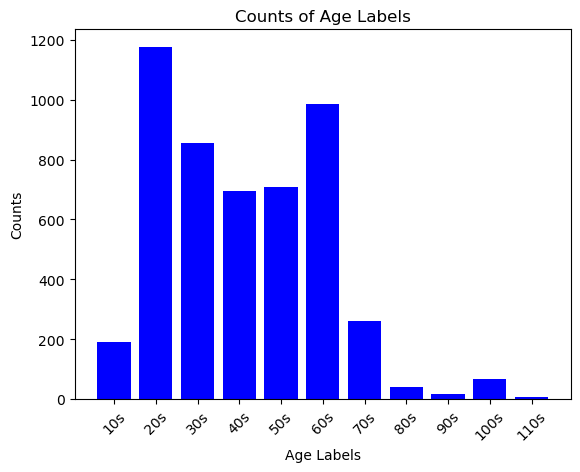

In [4]:
if __name__ == "__main__":
    file_path = "./age/en/en.train.json"
    print('--------Training Data--------')
    main(file_path)

## Check Test Data Imbalance

--------Test Data--------
Total Data Count: 403
Counts of Each Age Label:
50s: 60
30s: 71
40s: 58
20s: 90
60s: 69
10s: 18
70s: 27
80s: 3
100s: 5
90s: 2


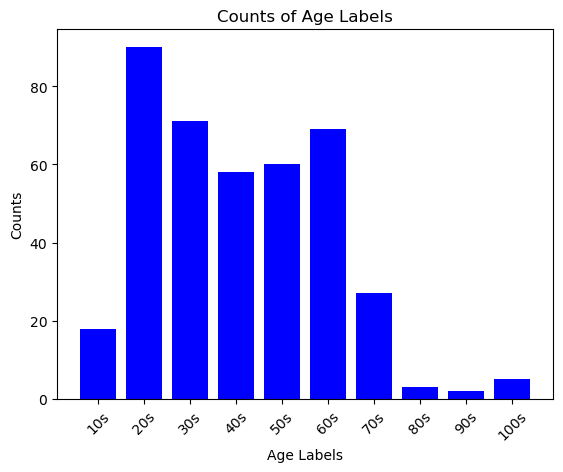

In [5]:
if __name__ == "__main__":
    file_path = "./age/en/en.test.json"
    print('--------Test Data--------')
    main(file_path)

## Each Text Token Count

In [6]:
def read_json(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    
    return data

In [7]:
train_file_path = "./age/en/en.train.json"
train_data=read_json(train_file_path)
test_file_path = "./age/en/en.test.json"
test_data=read_json(test_file_path)

In [8]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
col = ['age', 'text']
df_train= df_train[col]
df_test= df_test[col]

def tokenize_text(text):
    return word_tokenize(text)

df_train['tokenized_text'] = df_train['text'].apply(tokenize_text)
df_test['tokenized_text'] = df_test['text'].apply(tokenize_text)

X_train = df_train['tokenized_text']
Y_train = df_train['age']
X_test = df_test['tokenized_text']
Y_test = df_test['age']

In [9]:
X_train.head()

0                [Not, the, best, overall, service, .]
1    [Since, it, is, the, #, 1, social, network, ho...
2    [Not, only, that, you, can, find, anything, ,,...
3    [I, 'm, always, satisfied, with, their, level,...
4    [On, time, ,, nice, chap, and, worked, like, a...
Name: tokenized_text, dtype: object

# Without preprocessing

In [10]:
def count_tokens(tokens):
    return len(tokens)

df_train['token_count'] = df_train['tokenized_text'].apply(count_tokens)
df_test['token_count'] = df_test['tokenized_text'].apply(count_tokens)

print(df_train[['tokenized_text', 'token_count']])

                                         tokenized_text  token_count
0                 [Not, the, best, overall, service, .]            6
1     [Since, it, is, the, #, 1, social, network, ho...           53
2     [Not, only, that, you, can, find, anything, ,,...           16
3     [I, 'm, always, satisfied, with, their, level,...           42
4     [On, time, ,, nice, chap, and, worked, like, a...           17
...                                                 ...          ...
4991  [Having, read, previous, reviews, I, am, surpr...          195
4992  [I, intially, contacted, your, customer, servi...           88
4993  [Well, priced, product, and, arrived, very, qu...            7
4994  [Love, the, variety, of, Brands, and, ease, in...           10
4995  [I, would, recommend, this, web, site, to, any...           29

[4996 rows x 2 columns]


In [11]:
max_token_count_train = df_train['token_count'].max()
min_token_count_train = df_train['token_count'].min()
average_token_count_train = df_train['token_count'].mean()

max_token_count_test = df_test['token_count'].max()
min_token_count_test = df_test['token_count'].min()
average_token_count_test = df_test['token_count'].mean()

print("Training dataset:")
print("Maximum token count:", max_token_count_train)
print("Minimum token count:", min_token_count_train)
print("Average token count:", average_token_count_train)

print("\nTest dataset:")
print("Maximum token count:", max_token_count_test)
print("Minimum token count:", min_token_count_test)
print("Average token count:", average_token_count_test)

Training dataset:
Maximum token count: 1439
Minimum token count: 1
Average token count: 62.128102481985586

Test dataset:
Maximum token count: 586
Minimum token count: 2
Average token count: 59.39454094292804


# With preprocessing

In [12]:
def preprocess_text(tokenized_text):
    
    tokenized_text = [word for word in tokenized_text if word not in string.punctuation]
    tokenized_text = [word.lower() for word in tokenized_text]
    stop_words = set(stopwords.words('english'))
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    tokenized_text = [word for word in tokenized_text if not word.isdigit()]

    return tokenized_text


X_train_prepro = X_train.apply(preprocess_text)
X_test_prepro = X_test.apply(preprocess_text)

In [13]:
print(X_train_prepro)

0                                [best, overall, service]
1       [since, social, network, however, take, leave,...
2              [find, anything, resources, apps, awesome]
3       ['m, always, satisfied, level, service, compet...
4       [time, nice, chap, worked, like, pro, happy, s...
                              ...                        
4991    [read, previous, reviews, surprised, odd, one,...
4992    [intially, contacted, customer, service, depar...
4993            [well, priced, product, arrived, quickly]
4994              [love, variety, brands, ease, ordering]
4995    [would, recommend, web, site, anyone, wanting,...
Name: tokenized_text, Length: 4996, dtype: object


In [14]:
df_train['token_count_prepro'] = X_train_prepro.apply(count_tokens)
df_test['token_count_prepro'] = X_test_prepro.apply(count_tokens)

print(df_train[['tokenized_text','token_count_prepro']])

                                         tokenized_text  token_count_prepro
0                 [Not, the, best, overall, service, .]                   3
1     [Since, it, is, the, #, 1, social, network, ho...                  22
2     [Not, only, that, you, can, find, anything, ,,...                   5
3     [I, 'm, always, satisfied, with, their, level,...                  18
4     [On, time, ,, nice, chap, and, worked, like, a...                   8
...                                                 ...                 ...
4991  [Having, read, previous, reviews, I, am, surpr...                  89
4992  [I, intially, contacted, your, customer, servi...                  37
4993  [Well, priced, product, and, arrived, very, qu...                   5
4994  [Love, the, variety, of, Brands, and, ease, in...                   5
4995  [I, would, recommend, this, web, site, to, any...                  15

[4996 rows x 2 columns]


In [15]:
max_token_count_train = df_train['token_count_prepro'].max()
min_token_count_train = df_train['token_count_prepro'].min()
average_token_count_train = df_train['token_count_prepro'].mean()

max_token_count_test = df_test['token_count_prepro'].max()
min_token_count_test = df_test['token_count_prepro'].min()
average_token_count_test = df_test['token_count_prepro'].mean()

print("Training dataset:")
print("Maximum token count:", max_token_count_train)
print("Minimum token count:", min_token_count_train)
print("Average token count:", average_token_count_train)

print("\nTest dataset:")
print("Maximum token count:", max_token_count_test)
print("Minimum token count:", min_token_count_test)
print("Average token count:", average_token_count_test)

Training dataset:
Maximum token count: 579
Minimum token count: 0
Average token count: 28.15632506004804

Test dataset:
Maximum token count: 242
Minimum token count: 2
Average token count: 27.411910669975185
